# CAS BDAI CUP SUBMISSION NOTEBOOK



# Import Data

In [ ]:
#import data
import pandas as pd
train = pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/99_CAS_BDAI_CUP/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/99_CAS_BDAI_CUP/test.csv")

In [ ]:
train.corr()

<ipython-input-8-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,year,price,mileage,tax,mpg,engineSize,ID
year,1.000000,0.596614,-0.776818,0.234072,-0.225089,-0.055572,-0.004961
price,0.596614,1.000000,-0.543286,0.391619,-0.412453,0.538620,-0.003326
mileage,-0.776818,-0.543286,1.000000,-0.275957,0.286799,0.083207,0.010213
tax,0.234072,0.391619,-0.275957,1.000000,-0.507412,0.314410,0.005422
mpg,-0.225089,-0.412453,0.286799,-0.507412,1.000000,-0.236910,0.004665
engineSize,-0.055572,0.538620,0.083207,0.314410,-0.236910,1.000000,0.004320
ID,-0.004961,-0.003326,0.010213,0.005422,0.004665,0.004320,1.000000


# Helper Functions

In [ ]:
def get_summary_report(X_train, y_train):
  import statsmodels.api as sm
  X_train = sm.add_constant(X_train, prepend=False)
  linreg_sm  = sm.OLS(y_train, X_train)
  results = linreg_sm.fit()
  return results

def plot_tree_classification(treemodel, X):
    from sklearn import tree
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(60,20))
    _ = tree.plot_tree(treemodel,filled=True,class_names=['0','1'],feature_names = X.columns,proportion=True,precision=2)

def plot_ROC(model, X_test, y_test):
  import matplotlib.pyplot as plt
  from sklearn.metrics import RocCurveDisplay
  tree_ROC = RocCurveDisplay.from_estimator(model, X_test, y_test, color='green', linewidth=3)
  plt.title('ROC Curve')
  plt.xlabel('False Alarm (1 - Specificity)')
  plt.ylabel('Recall (Sensitivity)')
  plt.show()

def plot_variable_importance(model, X_train):
  import pandas as pd
  import matplotlib.pyplot as plt
  importances = pd.Series(data=model.feature_importances_,
                          index=X_train.columns)
  importances.sort_values().plot(kind='barh', color="#00802F")
  plt.title('Features Importances')

def save_submission_for_kaggle(model_name, test_predictions, test):
  import pandas as pd
  submission_data = pd.DataFrame({"ID": test["ID"], "Actual": test_predictions})
  submission_data.to_csv(model_name, index=False)

def actual_vs_predicted_plot(y_true, y_pred):
  import numpy as np
  import matplotlib.pyplot as plt
  min_value=np.array([y_true.min(), y_pred.min()]).min()
  max_value= min=np.array([y_true.max(), y_pred.max()]).max()
  fig = plt.figure()
  ax = fig.gca()
  ax.scatter(y_true,y_pred, color="blue")
  ax.plot([min_value,max_value], [min_value, max_value], lw=4, color="green")
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.show()

# Build Model Linear Regression (default)

In [ ]:
# Import Functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Instantiate Model
model = LinearRegression()

# Create Train Data
X = train.drop("price", axis=1)
y = train["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# fit model
model.fit(X_train, y_train)

#make prediction
y_pred = model.predict(X_test)

# Evaluate Model Performance
mean_squared_error(y_test, y_pred, squared=False)



4152.394556077138

# Build Model Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV


train = pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/99_CAS_BDAI_CUP/train.csv")
train = pd.get_dummies(train, drop_first=True)
test = pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/99_CAS_BDAI_CUP/test.csv")
test = pd.get_dummies(test, drop_first=True)
test= test.drop([ "fuelType_Other"], axis=1)


X = train.drop(["price", "fuelType_Other"], axis=1)
y = train["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)



In [ ]:
forest_model = RandomForestRegressor(n_estimators=177)
RMSE = make_scorer(mean_squared_error, squared=False, greater_is_better=False)
parameters = { 'max_depth': [None] , 'min_samples_split': [4], 'min_samples_leaf': [ 2], 'max_features': [19]}
model_CV = GridSearchCV(forest_model, parameters, scoring=RMSE, cv=8, verbose=3)
model_CV.fit(X, y)

print ("best Params: ", model_CV.best_params_)
y_pred = model_CV.predict(X_test)


print("mean_sqrt: ", mean_squared_error(y_test, y_pred, squared=False))
print("abs%: ", mean_absolute_percentage_error(y_test, y_pred))


Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8] END max_depth=50, max_features=19, min_samples_leaf=2, min_samples_split=4;, score=-2010.184 total time=  14.2s
[CV 2/8] END max_depth=50, max_features=19, min_samples_leaf=2, min_samples_split=4;, score=-3262.319 total time=  12.7s
[CV 3/8] END max_depth=50, max_features=19, min_samples_leaf=2, min_samples_split=4;, score=-2188.882 total time=  12.8s
[CV 4/8] END max_depth=50, max_features=19, min_samples_leaf=2, min_samples_split=4;, score=-2033.983 total time=  12.5s
[CV 5/8] END max_depth=50, max_features=19, min_samples_leaf=2, min_samples_split=4;, score=-1989.985 total time=  12.5s
[CV 6/8] END max_depth=50, max_features=19, min_samples_leaf=2, min_samples_split=4;, score=-2016.533 total time=  12.4s
[CV 7/8] END max_depth=50, max_features=19, min_samples_leaf=2, min_samples_split=4;, score=-2034.476 total time=  12.6s
[CV 8/8] END max_depth=50, max_features=19, min_samples_leaf=2, min_samples_split=4;, score=-2

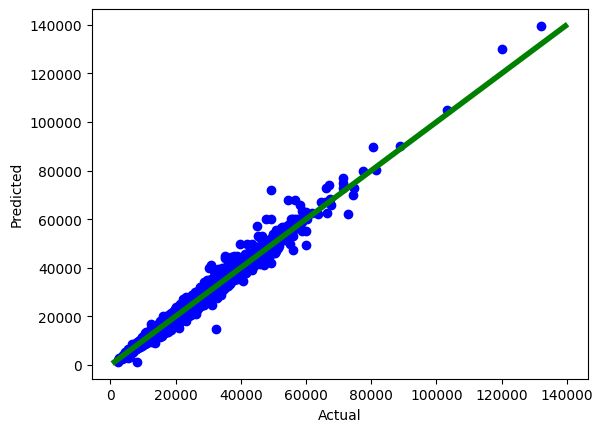

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_Final = model_CV.predict(test)
actual_vs_predicted_plot(y_pred, y_test)
model_name = "Team5.TestSubmission.14.csv"
save_submission_for_kaggle(model_name, y_Final, test)

try:
  from google.colab import files
  files.download(model_name)
except ModuleNotFoundError:
  print("Not using Google Colab")

In [ ]:
model_CV.best_score_


-2452.260392498467

# Save Results for Submission

Make predictions on the competition data with your trained model

In [ ]:
test_predictions= model.predict(test)

In [ ]:
model_name = "Team5.TestSubmission.csv"

In [ ]:
def save_submission_for_kaggle(model_name, test_predictions, test):
  import pandas as pd
  submission_data = pd.DataFrame({"ID": test["ID"], "Actual": test_predictions})
  submission_data.to_csv(model_name, index=False)

## Save submission file

In [ ]:
save_submission_for_kaggle(model_name, test_predictions, test)

NameError: ignored

## FOR GOOGLE COLAB USERS ONLY: Download the created file

In [ ]:
try:
  from google.colab import files
  files.download(model_name)
except ModuleNotFoundError:
  print("Not using Google Colab")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## FOR ANACONDA USERS ONLY: Find the created file in your folder structure

The file is located in the same directory as your notebook.

In [ ]:
# run this cell if you don't know the location
import os
print(os.getcwd())

# How to get Going

- Try out other algorithms!
- Try out Cross Validation and Hyperparameter Tuning (see coding hint below)
- Try to understand why different models perform better or worse. Make Visualizations (Actual vs. Predicted Plots, Feature Importances, etc.)
- Try to make ensemble different predictions (average of multiple models)

# Implementation Help for Grid Search

In [ ]:
#parameters = {'max_depth':range(1,30),   'min_samples_leaf':[1, 10, 20, 30, 50, 100]}
#tree_CV = GridSearchCV(DecisionTreeClassifier(criterion="entropy", random_state=1), parameters, cv=5)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# fit model
RMSE = make_scorer(mean_squared_error, squared = False, greater_is_better=False) #we create an RMSE scoring function
parameters = _____ # hyperparameters to be optimized
model_CV = GridSearchCV(_____, parameters, scoring=RMSE, cv=5) # Apply 5 Cross Validiation Folds to find best hyperparameters